<h4>Importing Libraries</h4>

In [1]:
import math
import numpy as np
import matplotlib
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import*
import random
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(2)
cube = PolynomialFeatures(3)

<b>Question No 1</b>

<ul>
    <li>Three Models have been Implemented- Linear, Quadratic & Cubic Polynomial
    <li>Matrix is used to solve the calculations. The formula used is (X'X)-1 X'y
    <li>Different Models have been selected for different output columns based on the MSE of the particular output value
    <li>The model is scalable and would predict the outputs based on how many columns have been provided as input to the function
    <li>The functions calls to 3 Separate Functions-to_linear, to_quad & to_cube for calculations
    

In [2]:
def my_regression(trainX, testX, noutputs):
    
    #Normalization of Datasets
    trainX=(trainX-mean(trainX,axis=0))/std(trainX,axis=0) #Normalization of trainX
    testX=(testX-mean(testX,axis=0))/std(testX,axis=0) #Normalization of testX
    test_y=testX[:,-noutputs:] #Extraction of output's matrix from the given test data set
 
    #linear Matrix
    ogtrain_x = np.ones((np.size(trainX,0),np.size(trainX,1)+1))
    ogtrain_x[:,1:] = trainX       #Extra Row of 1 is added 
    outputs=ogtrain_x[:,-noutputs:] #Save Output Columns from Training Data with specified number of noutputs
    temp_array=ogtrain_x
    for i in range(0,noutputs):
        temp_array=temp_array[:,:-1] #Remove Output Columns from Training Data with specified number of noutputs
    ogtrain_x=temp_array
    check_val=int(np.size(trainX,0)/5) #Find the value of each Cross Validation Fold
    
    #Quadratic Matrix
    #Similar Operation performed as Linear. 
    #Quadratic data has been saved differetly frm linear for easy debugging & clarity
    
    ogtrain_x_quad=trainX
    outputs_quad=ogtrain_x_quad[:,-noutputs:]
    temp_array=ogtrain_x_quad
    for i in range(0,noutputs):
        temp_array=temp_array[:,:-1]
    ogtrain_x_quad=temp_array
    ogtrain_x_quad=quad.fit_transform(ogtrain_x_quad) #making the given feature matrix to a quadratic order feature matrix
    trainX_quad=ogtrain_x_quad
 
    #Cubic Matrix
    #Separate data for Cubic Polynomial Regression is saved
    ogtrain_x_cube=trainX
    outputs_cube=ogtrain_x_cube[:,-noutputs:]
    temp_array=ogtrain_x_cube
    for i in range(0,noutputs):
        temp_array=temp_array[:,:-1]
    ogtrain_x_cube=temp_array
    ogtrain_x_cube=cube.fit_transform(ogtrain_x_cube) #making the given feature matrix to a cubic order feature matrix
    trainX_cube=ogtrain_x_cube
        
    #Linear Regression
    mse_val=[]
    avg_mse=[]
    c_len=int(np.size(trainX,0)/5)
    init=0
    #5-Fold Cross Validation for Linear Model
    for i in range(0,5):
        y=outputs[init:c_len]   #y->True values of y for current fold
        train_x=np.delete(ogtrain_x, np.s_[init:c_len], 0)   #cvtrain_x->y values of current fold
        train_y=np.delete(outputs, np.s_[init:c_len], 0)
        test_x=ogtrain_x[init:c_len]
        
        train_xT=np.transpose(train_x)
        mul_val=train_xT@train_x
        inv_part=np.linalg.pinv(mul_val)
        w=inv_part@train_xT@train_y
        pred_y=test_x@w
        
        mse=y-pred_y
        mse=np.square(mse)
        mse=mse.sum(axis=0)
        mse=mse/np.size(test_x,0)
        mse_val.append(mse)
        
        init=c_len
        c_len=c_len+int(np.size(trainX,0)/5)
    for i in range(0,noutputs):
        
        #Calculation of Average MSE of all Output Columns for Linear Model 
        avg_mse.append((mse_val[0][i]+mse_val[1][i]+mse_val[2][i]+mse_val[3][i]+mse_val[4][i])/5)
    print('Error for Linear Model:')
    print(avg_mse)
    
    #Quadratic Equation
    avg_mse_quad=[]
    c_len=int(np.size(trainX_quad,0)/5)
    init=0
    mse_val_quad=[]
    avg_mse_quad=[]
    
    #5-Fold Cross Validation for Quadratic Model
    for i in range(0,5):
        y_quad=outputs_quad[init:c_len]   #y->True values of y for current fold
        train_x_quad=np.delete(ogtrain_x_quad, np.s_[init:c_len], 0)   #cvtrain_x->y values of current fold
        train_y_quad=np.delete(outputs_quad, np.s_[init:c_len], 0)
        test_x_quad=ogtrain_x_quad[init:c_len]
        
        train_xT_quad=np.transpose(train_x_quad)
        mul_val_quad=train_xT_quad@train_x_quad
        reg_mat=np.identity(np.size(mul_val_quad,0))
       
        inv_part_quad=np.linalg.pinv(mul_val_quad)
        w_quad=inv_part_quad@train_xT_quad@train_y_quad
        pred_y_quad=test_x_quad@w_quad
        
        mse=y_quad-pred_y_quad
        mse=np.square(mse)
        mse=mse.sum(axis=0)
        mse=mse/np.size(test_x_quad,0)
        mse_val_quad.append(mse)
        init=c_len
        c_len=c_len+int(np.size(trainX,0)/5)
    for i in range(0,noutputs):
        
        #Calculation of Average MSE of all Output Columns for Quadratic Model
        avg_mse_quad.append((mse_val_quad[0][i]+mse_val_quad[1][i]+mse_val_quad[2][i]+mse_val_quad[3][i]+mse_val_quad[4][i])/5)
    print('Error of Quadratic Model:')
    print(avg_mse_quad)
    
    #Cubic Equation
    avg_mse_cube=[]
    mse_val_cube=[]
    c_len=int(np.size(trainX_cube,0)/5)
    init=0
    
    #5-Fold Cross Validation for Cubic Model
    for i in range(0,5):
        y_cube=outputs_cube[init:c_len]   #y->True values of y for current fold
        train_x_cube=np.delete(ogtrain_x_cube, np.s_[init:c_len], 0)   #cvtrain_x->y values of current fold
        train_y_cube=np.delete(outputs_cube, np.s_[init:c_len], 0)
        test_x_cube=ogtrain_x_cube[init:c_len]
        train_xT_cube=np.transpose(train_x_cube)
        mul_val_cube=train_xT_cube@train_x_cube
        
        inv_part_cube=np.linalg.pinv(mul_val_cube)
        w_cube=inv_part_cube@train_xT_cube@train_y_cube
        pred_y_cube=test_x_cube@w_cube
        
        mse=y_cube-pred_y_cube
        mse=np.square(mse)
        mse=mse.sum(axis=0)
        mse=mse/np.size(test_x_cube,0)
        mse_val_cube.append(mse)
        init=c_len
        c_len=c_len+int(np.size(trainX,0)/5)   
    for i in range(0,noutputs):
        #Calculation of Average MSE of all Output Columns for Cubic Model
        avg_mse_cube.append((mse_val_cube[0][i]+mse_val_cube[1][i]+mse_val_cube[2][i]+mse_val_cube[3][i]+mse_val_cube[4][i])/5)
    
    print('Error of Cubic Model:')
    print(avg_mse_cube)
    for i in range(0,noutputs):
        a=avg_mse[i]
        b=avg_mse_quad[i]
        c=avg_mse_cube[i]

        
        #Model Selection
        if(a <= b and a <= c):
            print("Linear Model is the best fit for Output Column: "+str(i+1))
            final_mse=to_linear(ogtrain_x,testX, outputs[:,noutputs-1],noutputs,test_y[:,noutputs-1])
        elif(b <= a and b <= c): 
            print("Quadratic Polynomial Model is the best fit for Output Column: "+str(i+1))
            final_mse=to_quad(ogtrain_x_quad,testX, outputs_quad[:,noutputs-1],noutputs,test_y[:,noutputs-1])
        else: 
            print("Cubic Polynomial Model is the best fit for Output Column: "+str(i+1))
            final_mse=to_cube(ogtrain_x_cube,testX, outputs_cube[:,noutputs-1],noutputs,test_y[:,noutputs-1])
    print('*********************************************************************************')
    return final_mse

In [3]:
 #Function defined to run linear model if selected
def to_linear(trainX,testX,outputs,noutputs,test_y):
    train_x=trainX
    train_xT=np.transpose(train_x)
    mul_val=train_xT@train_x
    inv_part=np.linalg.pinv(mul_val)
    w=inv_part@train_xT@outputs
    
    test_x=np.ones((np.size(testX,0),np.size(testX,1)+1))
    test_x[:,1:]=testX
    temp_array=test_x
    for i in range(0,noutputs):
        temp_array=temp_array[:,:-1]
    test_x=temp_array
    pred_y=test_x@w
    mse=test_y-pred_y
    mse=np.square(mse)
    mse=mse.sum()
    mse=mse/np.size(test_x,0)
    print('The mse for Output Column '+str(noutputs)+' is '+str(mse))
    fig=plt.figure()
    plt.figure(figsize=(15,8))
    plt.plot(test_y,marker='o')
    plt.plot(pred_y,marker='o',color='red')
    plt.xlabel('Values', size=12)
    plt.ylabel('Data Points', size=12)
    plt.legend(["Actual Points", "Predicted Points"], loc=0, fontsize=10)
    plt.show()
    
    return mse

In [4]:
#Function defined to run quadratic model if selected
def to_quad(trainX,testX,outputs,noutputs,test_y):  
    final_mse=1000
    temp_array=testX
    for i in range(0,noutputs):
        temp_array=temp_array[:,:-1]
    test_x=temp_array
    test_x=quad.fit_transform(test_x)
    
    train_x=trainX
    train_xT=np.transpose(train_x)
    mul_val=train_xT@train_x
    reg_mat=np.identity(np.size(mul_val,0))
    zero_mat=np.zeros(np.size(mul_val,0))
    reg_mat[:,0]=zero_mat
    
    for i in [0.1,0.5,1,10]:

        mul_val=mul_val+i*reg_mat  #regularization
        inv_part=np.linalg.pinv(mul_val)
        w=inv_part@train_xT@outputs
        pred_y=test_x@w
        mse=test_y-pred_y
        mse=np.square(mse)
        mse=mse.sum()
        mse=mse/np.size(test_x,0)
        if mse<final_mse:
            final_w=w
            final_mse=mse
            lamda_val=i
            final_pred_y=pred_y
    
    print('Lambda Value Selected:'+str(lamda_val))
    print('The mse for Output Column '+str(noutputs)+' is '+str(final_mse))
    
    fig=plt.figure()
    plt.figure(figsize=(15,8))
    plt.plot(test_y,marker='o')
    plt.plot(pred_y,marker='o',color='red')
    plt.xlabel('Values', size=12)
    plt.ylabel('Data Points', size=12)
    plt.legend(["Data Points"], loc=0, fontsize=10)
    plt.show()
    
    return final_mse

In [5]:
#Function defined to run cubic model if selected
def to_cube(trainX,testX,outputs,noutputs,test_y):  
    
    final_mse=1000
    temp_array=testX
    for i in range(0,noutputs):
        temp_array=temp_array[:,:-1]
    test_x=temp_array
    test_x=cube.fit_transform(test_x)
    
    train_x=trainX
    train_xT=np.transpose(train_x)
    mul_val=train_xT@train_x
    reg_mat=np.identity(np.size(mul_val,0))
    zero_mat=np.zeros(np.size(mul_val,0))
    reg_mat[:,0]=zero_mat
    
    #Regularization
    for i in [0.1,0.5,1,10]:
        mul_val=mul_val+i*reg_mat
        inv_part=np.linalg.pinv(mul_val)
        w=inv_part@train_xT@outputs
        pred_y=test_x@w
        mse=test_y-pred_y
        mse=np.square(mse)
        mse=mse.sum()
        mse=mse/np.size(test_x,0)
        if mse<final_mse:
            final_w=w
            final_mse=mse
            lamda_val=i
            final_pred_y=pred_y
    
    print('Lambda:'+str(lamda_val))
    print('The mse for Output Column '+str(noutputs)+' is '+str(mse))
    
    fig=plt.figure()
    plt.figure(figsize=(15,8))
    plt.plot(test_y,marker='o')
    plt.plot(pred_y,marker='o',color='red')
    plt.xlabel('Values', size=12)
    plt.ylabel('Data Points', size=12)
    plt.legend(["Data Points"], loc=0, fontsize=10)
    plt.show()
    
    return final_mse

<b>Question No 2 </b>

<ul>
    <li>For Question No 2, we have used list to store the true values
    <li>The noise for different values are plotted with the truth values

<Figure size 432x288 with 0 Axes>

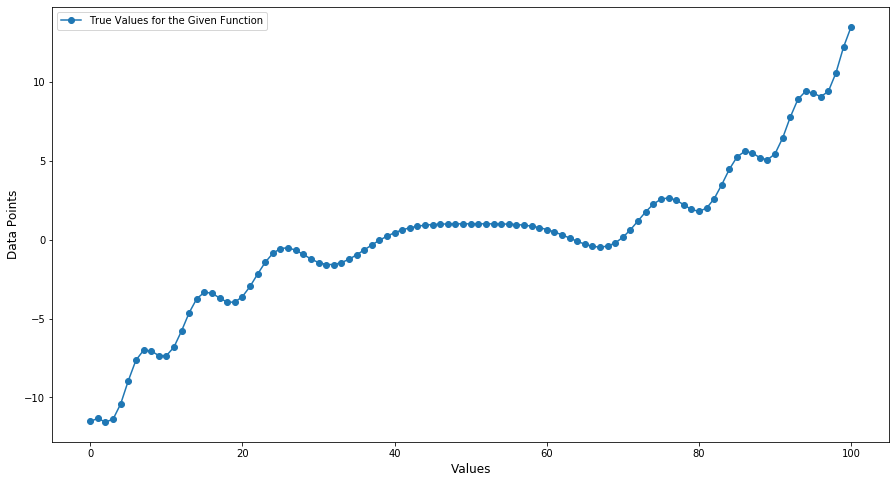

In [6]:
# Question 2 (a)
#Making a list of cosine function with x values (-5,+5).
#100 datapoints in total are generated
x=-5
new_list=[]
y_list=[]

while x<=5:
    format(5.00000, '.2f')
    new_list.append(format(x, '.2f'))
    x=x+0.1
    
for i in new_list:
    #getting the true data set from the given function in range -5<= x <=5
    y_list.append(math.cos(float(i)*float(i))+0.1*(float(i)**3)) 


fig=plt.figure() #plot of true data set
plt.figure(figsize=(15,8))
plt.plot(y_list,marker='o')
plt.xlabel('Values', size=12)
plt.ylabel('Data Points', size=12)
plt.legend(["True Values for the Given Function"], loc=0, fontsize=10)
plt.show()

In [7]:
#Question 2 b) Plot for different noise

#For Gaussian Noise 0.1
noise=[]
y_noise_first=[]
#Adding Noise
for i in range(len(y_list)):
    x=random.gauss(0,0.1)
    noise.append(x)

for i in range(0, len(y_list)):
    y_noise_first.append(y_list[i]+noise[i]) 



In [8]:
#For Gaussian Noise 0.5
noise=[]
y_noise_second=[]
#Adding Noise
for i in range(len(y_list)):
    x=random.gauss(0,0.5)
    noise.append(x)

for i in range(0, len(y_list)):
    y_noise_second.append(y_list[i]+noise[i]) 



In [9]:
#For Gaussian Noise 1
noise=[]
y_noise_third=[]
#Adding Noise
for i in range(len(y_list)):
    x=random.gauss(0,1)
    noise.append(x)

for i in range(0, len(y_list)):
    y_noise_third.append(y_list[i]+noise[i]) 


<Figure size 432x288 with 0 Axes>

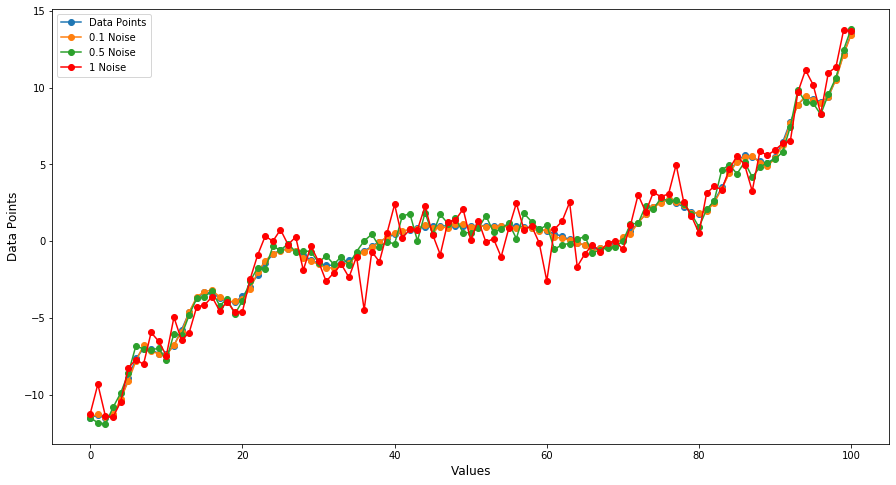

In [10]:
#Plot of true data set and data sets with different noise together
fig=plt.figure()
plt.figure(figsize=(15,8))
plt.plot(y_list,marker='o')
plt.plot(y_noise_first,marker='o')
plt.plot(y_noise_second,marker='o')
plt.plot(y_noise_third,marker='o',color='red')
plt.xlabel('Values', size=12)
plt.ylabel('Data Points', size=12)
plt.legend(["Data Points",'0.1 Noise','0.5 Noise','1 Noise'], loc=0, fontsize=10)
plt.show()

<b>Question No 2 (c)</b>

In [11]:

#The Function error_calc is used to calculate the mse values of all combinations of noise values and dataset size
#The noise is then saved in data_val dataframe
wt_list=[]
#Error Calculation for Different Dataset Sizes
def error_calc(e):
    for d in [2,5,10,20,50,100,200,500]:
        noise_list=[]
        truth_list=[]
        final_list=[]
        array_list=[]
        error_list=[]
        for i in range(0,d):
            #Random x values are generated and a truth value from the cost function is created
            rand_val=random.gauss(0,5)  
            true_val=math.cos(float(rand_val)*float(rand_val))+0.1*(float(rand_val)**3)
            truth_list.append(true_val)
            
            #Random Gaussian Noise is generated with specified Standard Deviation and then added to the true vale
            noise=random.gauss(0,e)
            val=float(true_val) + float(noise)
            final_list.append(val)
            
            #The Generated Values are stored in a Dataframe
            array_list=(final_list,truth_list)
            dfObj = pd.DataFrame(array_list)
            dfObj=dfObj.transpose()
         
        #The dataframe is then converted to numpy array and then divided into training & testing data
        dfObj=dfObj.sample(frac=1).reset_index(drop=True)
        train_data=dfObj[0:int(0.8*len(dfObj))].to_numpy()
        test_data=dfObj[int(0.8*len(dfObj)):].to_numpy()
        test_df = pd.DataFrame({'col':y_list})
        if int(0.8*(d/5))<1:
            train_y=train_data[:,-1]
            train_x=train_data[:,:-1]
            test_y=test_data[:,-1]
            test_x=test_data[:,:-1]
            print("5-Fold Cross Validation not Possible. Linear Model Implemented")
            mse_val=to_linear(train_x,test_x, train_y,1,test_y)
            
        else:
            mse_val=my_regression(train_data,test_data,1)
        
        print('Data Rows: '+str(d)+' & Noise: '+str(e))
        data_val[e][d]=mse_val
        

In [12]:
#data_val is the dataframe where all the MSE values are saved
data_val=np.empty([8,4])
data_val=pd.DataFrame(data=data_val, index=[2,5,10,20,50,100,200,500], columns=[0.1,0.2,0.5,1])

#The function is used to call error_calc function with different noise values 
#that then calculates the MSE combinations of different combinations of dataset size

def dataframe_creation():
    #Error for different Noise values are calculated
    for e in [0.1,0.2,0.5,1]:
        error_calc(e)

5-Fold Cross Validation not Possible. Linear Model Implemented
The mse for Output Column 1 is 19.052990853574112


<Figure size 432x288 with 0 Axes>

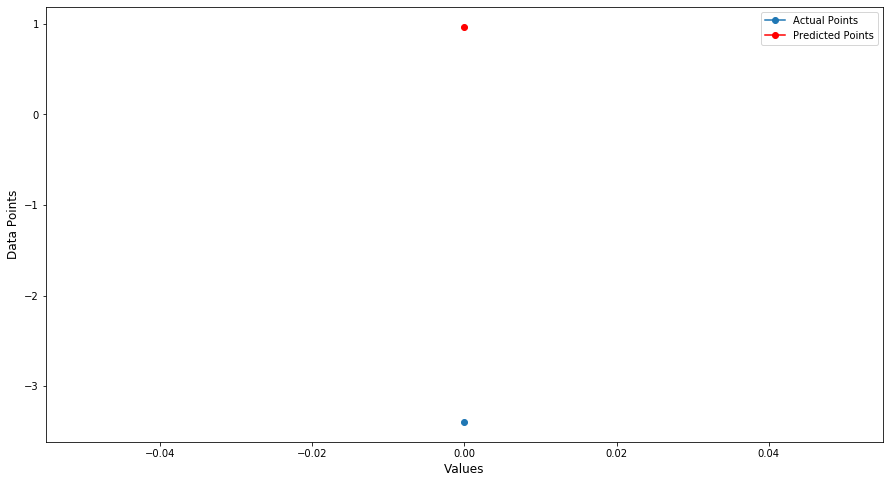

Data Rows: 2 & Noise: 0.1
5-Fold Cross Validation not Possible. Linear Model Implemented
The mse for Output Column 1 is 1305.9147167235908


<Figure size 432x288 with 0 Axes>

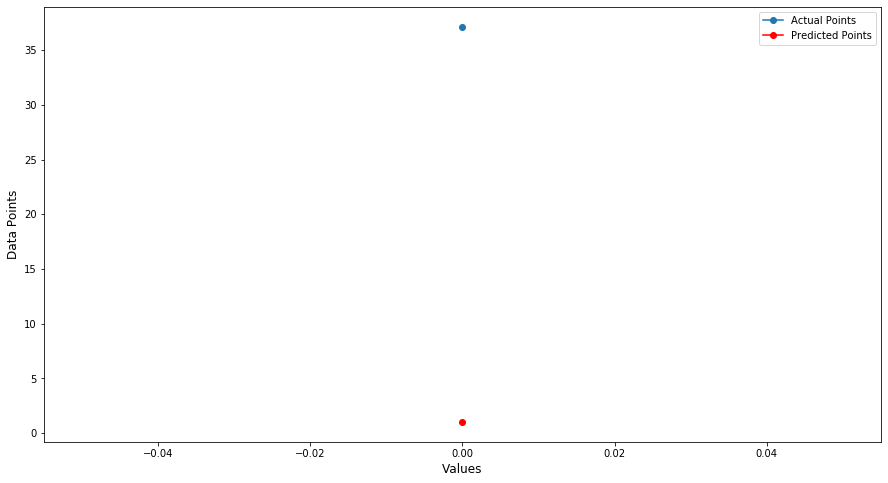

Data Rows: 5 & Noise: 0.1
Error for Linear Model:
[5.717005539484919e-07]
Error of Quadratic Model:
[1.0784446566679222e-06]
Error of Cubic Model:
[1.8823521653304788e-06]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 2.778033792630595e-14


<Figure size 432x288 with 0 Axes>

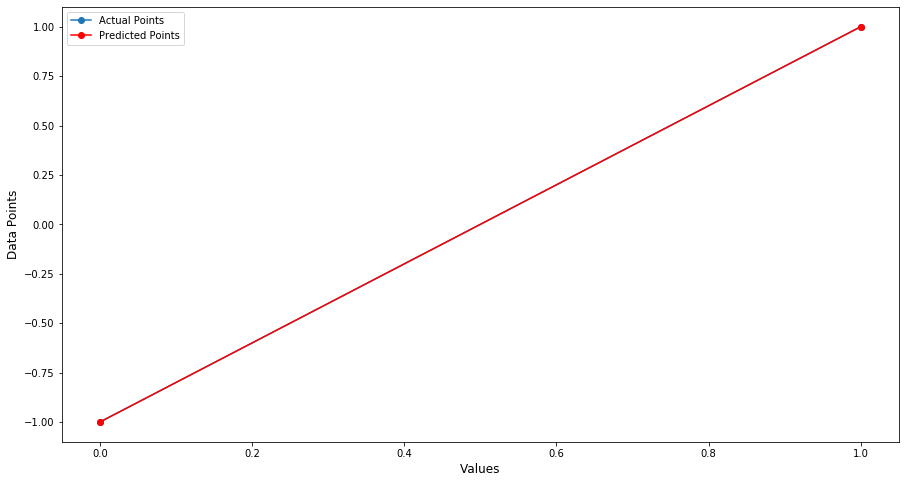

*********************************************************************************
Data Rows: 10 & Noise: 0.1
Error for Linear Model:
[5.818112026771637e-05]
Error of Quadratic Model:
[6.43562554701368e-05]
Error of Cubic Model:
[7.815318362768993e-05]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 7.460911166128665e-08


<Figure size 432x288 with 0 Axes>

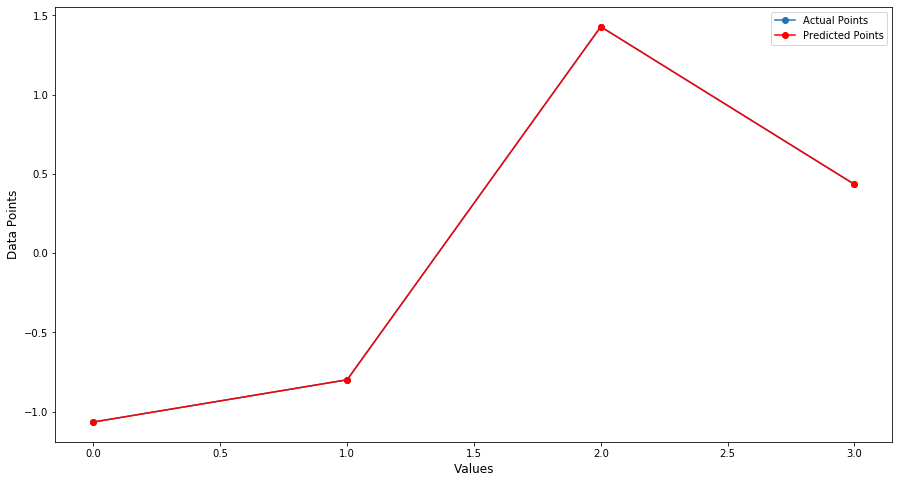

*********************************************************************************
Data Rows: 20 & Noise: 0.1
Error for Linear Model:
[1.0626482168848798e-05]
Error of Quadratic Model:
[1.7580986602787563e-05]
Error of Cubic Model:
[1.0859688238263816e-05]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 8.053540791012756e-06


<Figure size 432x288 with 0 Axes>

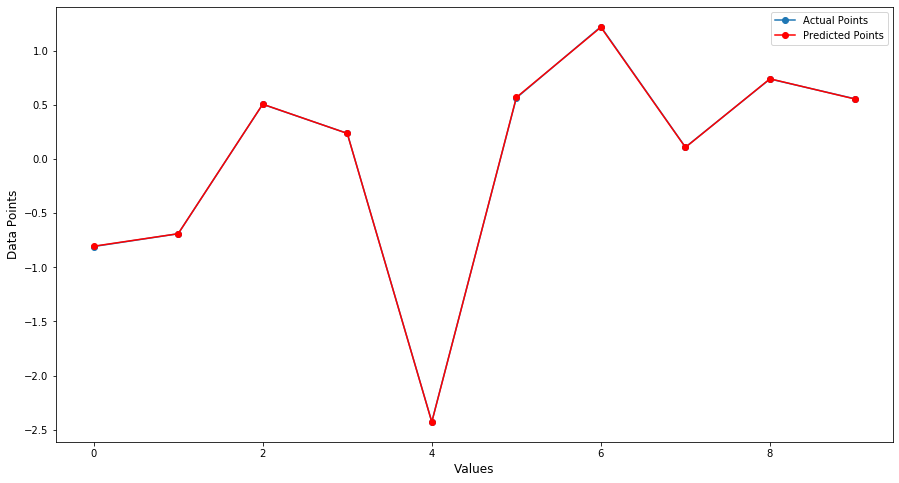

*********************************************************************************
Data Rows: 50 & Noise: 0.1
Error for Linear Model:
[6.891918980828233e-06]
Error of Quadratic Model:
[7.543873481165405e-06]
Error of Cubic Model:
[7.68246528522396e-06]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 1.872385658159405e-05


<Figure size 432x288 with 0 Axes>

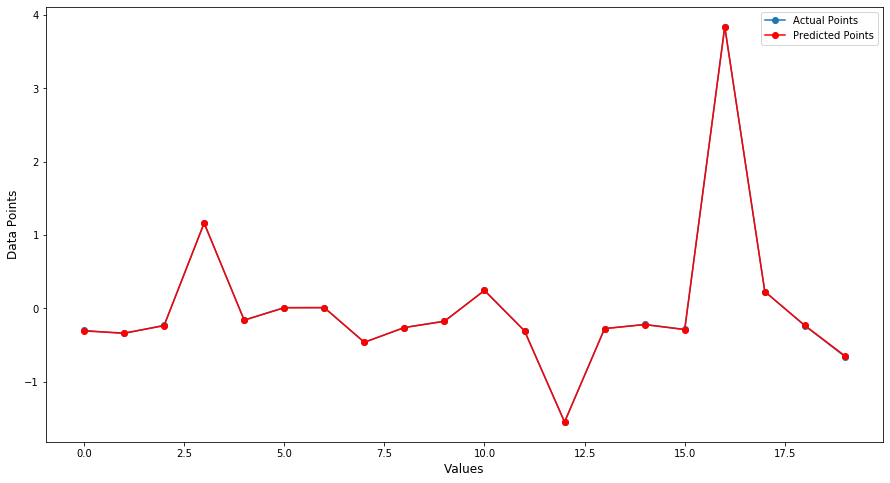

*********************************************************************************
Data Rows: 100 & Noise: 0.1
Error for Linear Model:
[6.187350134660659e-06]
Error of Quadratic Model:
[6.3771387261930324e-06]
Error of Cubic Model:
[7.904016477886666e-06]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 4.185817673730301e-06


<Figure size 432x288 with 0 Axes>

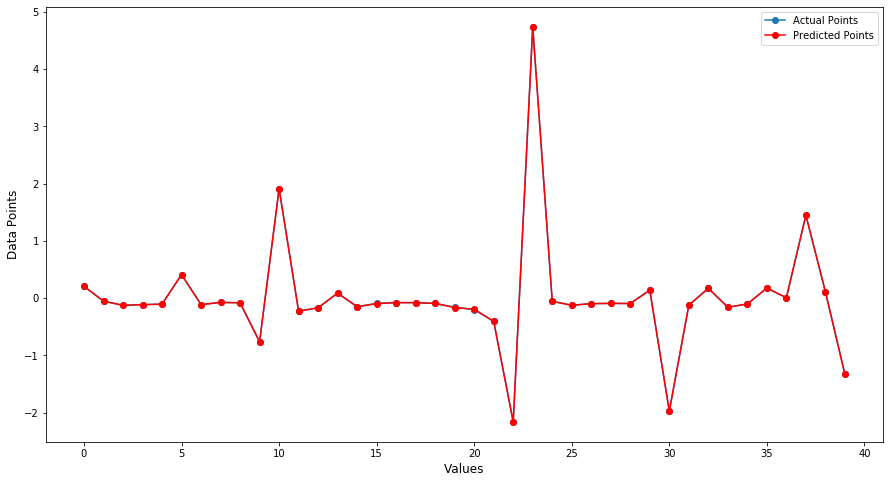

*********************************************************************************
Data Rows: 200 & Noise: 0.1
Error for Linear Model:
[5.773665153657435e-06]
Error of Quadratic Model:
[5.754186424156141e-06]
Error of Cubic Model:
[6.316602034526536e-06]
Quadratic Polynomial Model is the best fit for Output Column: 1
Lambda Value Selected:0.1
The mse for Output Column 1 is 5.728056292751084e-06


<Figure size 432x288 with 0 Axes>

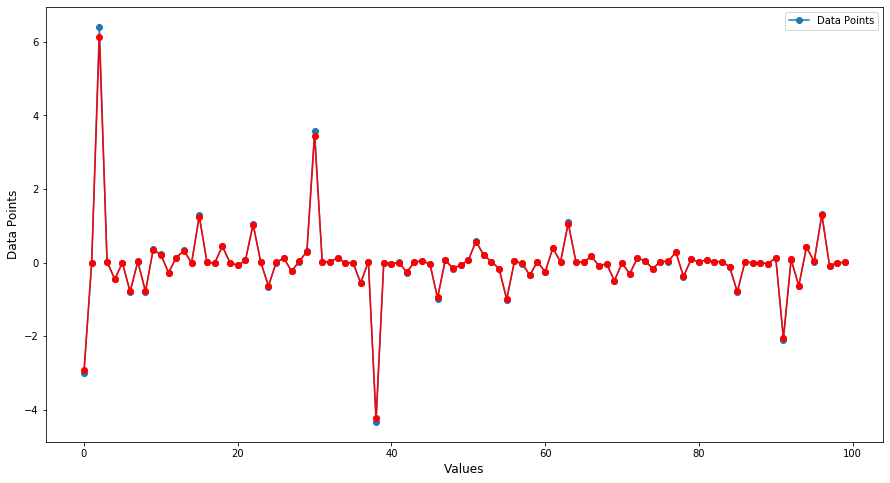

*********************************************************************************
Data Rows: 500 & Noise: 0.1
5-Fold Cross Validation not Possible. Linear Model Implemented
The mse for Output Column 1 is 827.1788207209926


<Figure size 432x288 with 0 Axes>

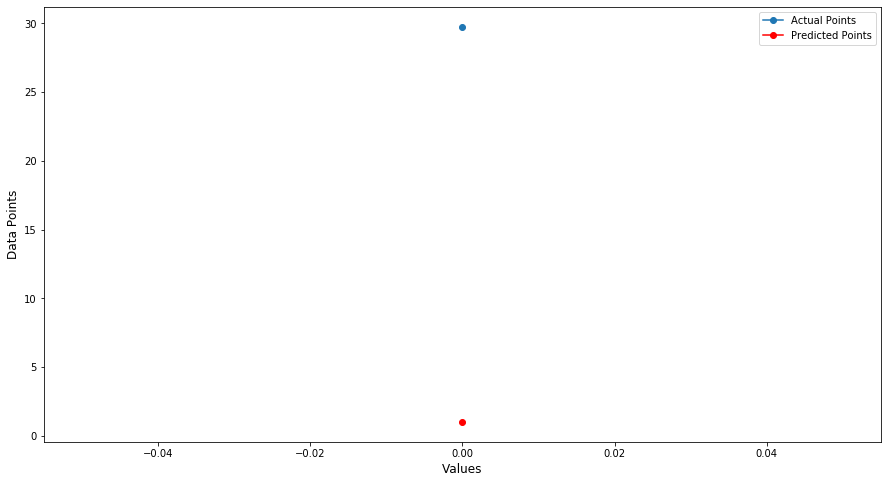

Data Rows: 2 & Noise: 0.2
5-Fold Cross Validation not Possible. Linear Model Implemented
The mse for Output Column 1 is 0.5497778916252534


<Figure size 432x288 with 0 Axes>

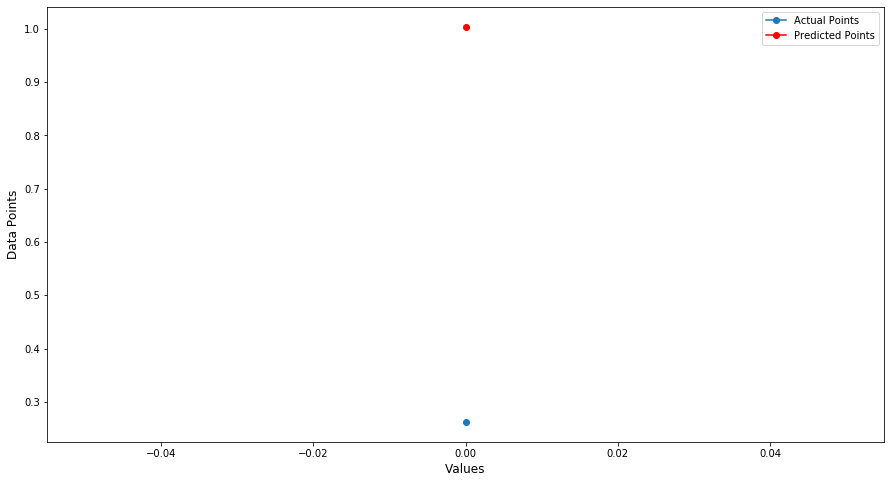

Data Rows: 5 & Noise: 0.2
Error for Linear Model:
[0.0007855661550662696]
Error of Quadratic Model:
[0.0820399399658065]
Error of Cubic Model:
[29.572024734516283]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 4.1603943443423175e-08


<Figure size 432x288 with 0 Axes>

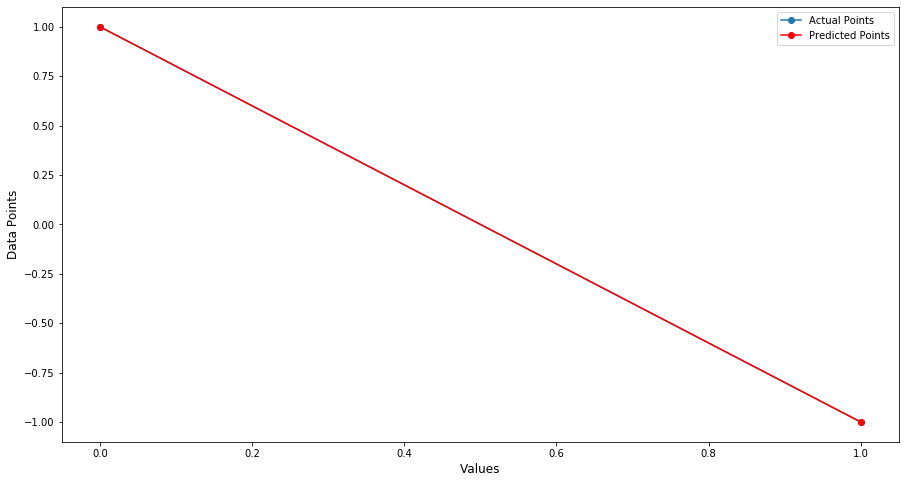

*********************************************************************************
Data Rows: 10 & Noise: 0.2
Error for Linear Model:
[0.00047962766465422705]
Error of Quadratic Model:
[0.0005541372634296158]
Error of Cubic Model:
[0.0011011910349343515]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 0.00011356255710274432


<Figure size 432x288 with 0 Axes>

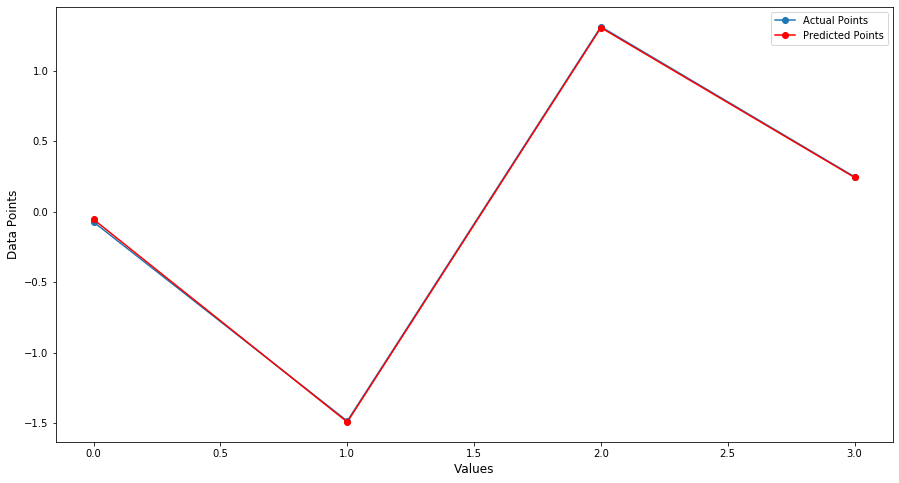

*********************************************************************************
Data Rows: 20 & Noise: 0.2
Error for Linear Model:
[3.137971583286198e-05]
Error of Quadratic Model:
[3.181948032747295e-05]
Error of Cubic Model:
[4.898803416649517e-05]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 5.0740360605479185e-05


<Figure size 432x288 with 0 Axes>

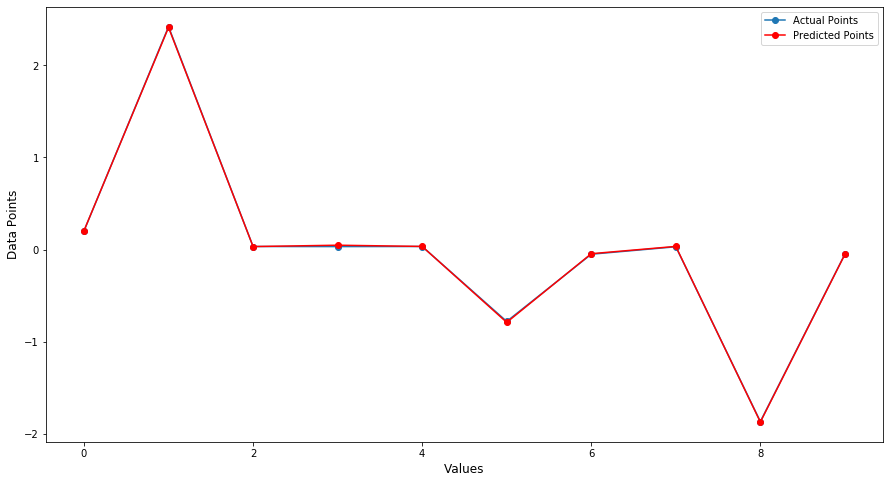

*********************************************************************************
Data Rows: 50 & Noise: 0.2
Error for Linear Model:
[1.2213605753138716e-05]
Error of Quadratic Model:
[1.2519627992070958e-05]
Error of Cubic Model:
[1.2510617913186205e-05]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 8.165681910751116e-06


<Figure size 432x288 with 0 Axes>

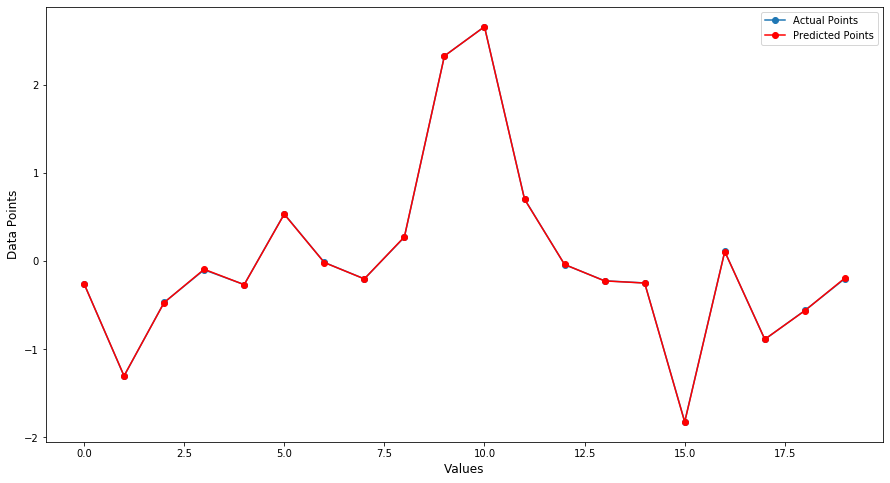

*********************************************************************************
Data Rows: 100 & Noise: 0.2
Error for Linear Model:
[2.0508984091812055e-05]
Error of Quadratic Model:
[2.069891443102432e-05]
Error of Cubic Model:
[2.7780156002960775e-05]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 2.7089501304368376e-05


<Figure size 432x288 with 0 Axes>

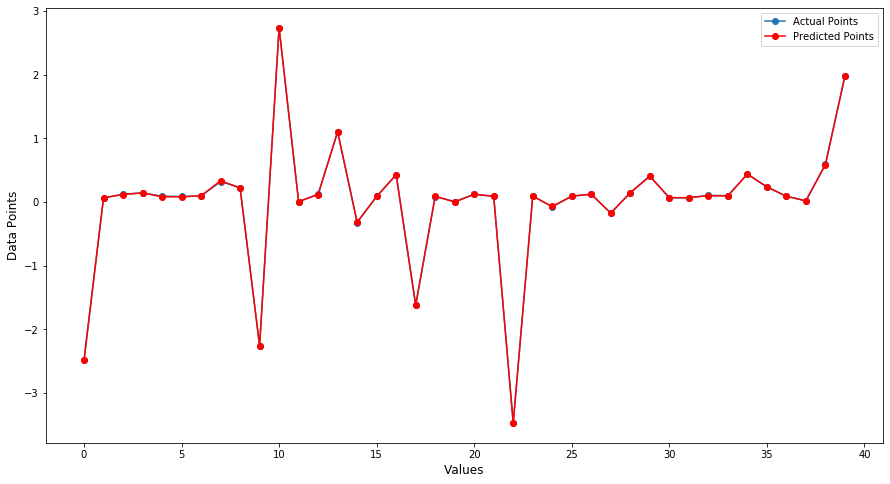

*********************************************************************************
Data Rows: 200 & Noise: 0.2
Error for Linear Model:
[1.3066986032647202e-05]
Error of Quadratic Model:
[1.2941324868901847e-05]
Error of Cubic Model:
[1.3270196470596497e-05]
Quadratic Polynomial Model is the best fit for Output Column: 1
Lambda Value Selected:0.1
The mse for Output Column 1 is 2.2502475714145548e-05


<Figure size 432x288 with 0 Axes>

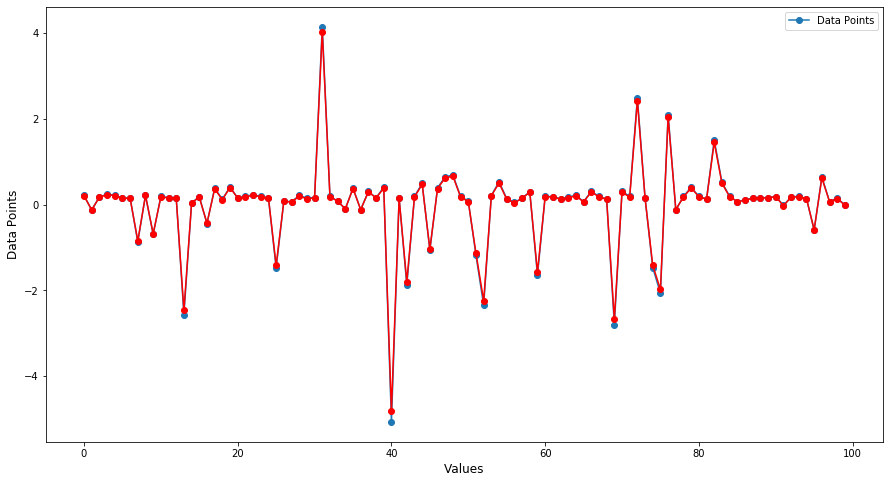

*********************************************************************************
Data Rows: 500 & Noise: 0.2
5-Fold Cross Validation not Possible. Linear Model Implemented
The mse for Output Column 1 is 17042.81874089741


<Figure size 432x288 with 0 Axes>

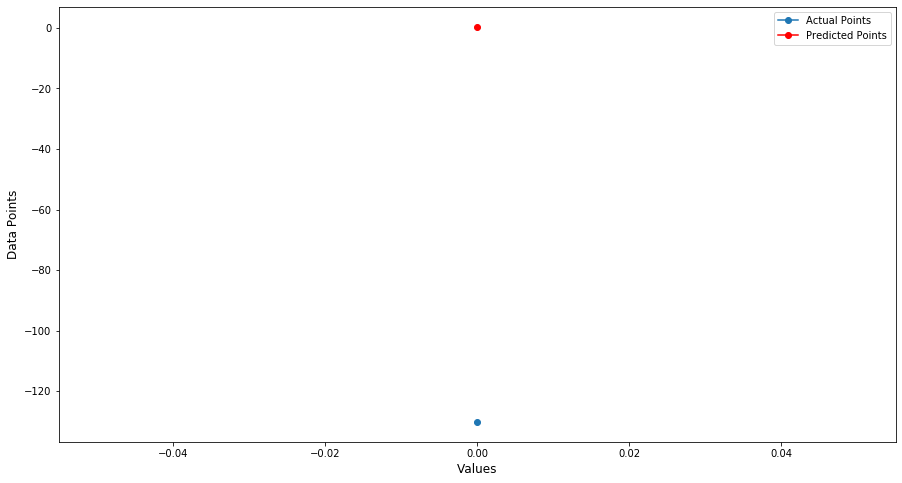

Data Rows: 2 & Noise: 0.5
5-Fold Cross Validation not Possible. Linear Model Implemented
The mse for Output Column 1 is 6.683581475307267


<Figure size 432x288 with 0 Axes>

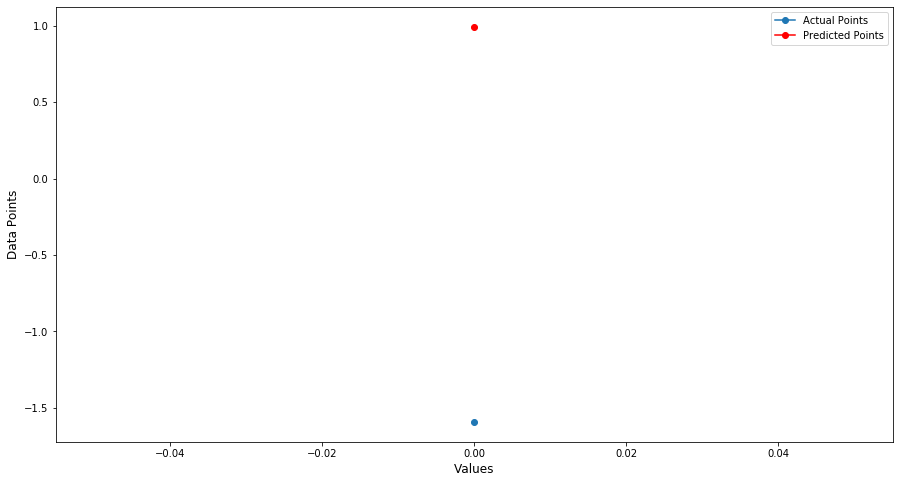

Data Rows: 5 & Noise: 0.5
Error for Linear Model:
[5.71926026945266e-06]
Error of Quadratic Model:
[6.709741001431598e-06]
Error of Cubic Model:
[9.864966333963317e-06]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 1.7299727888906803e-11


<Figure size 432x288 with 0 Axes>

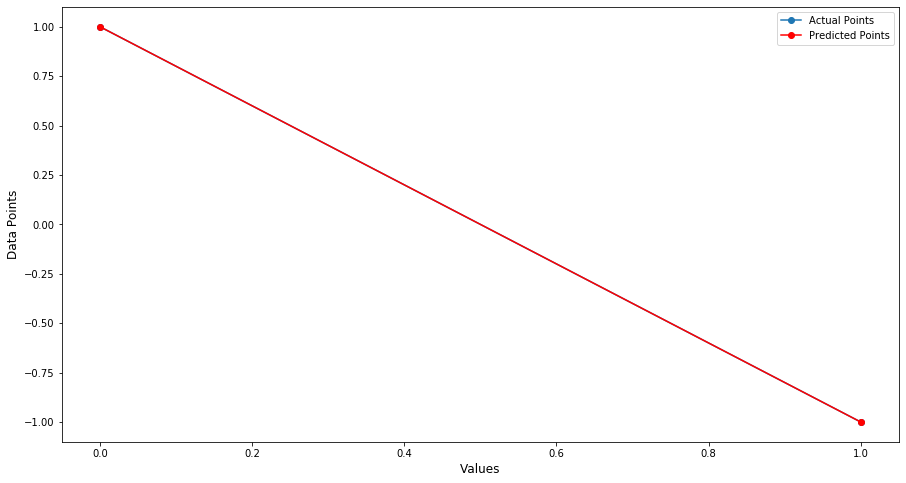

*********************************************************************************
Data Rows: 10 & Noise: 0.5
Error for Linear Model:
[0.0033511247557884982]
Error of Quadratic Model:
[0.00883305900523952]
Error of Cubic Model:
[0.006308436138592241]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 0.00026334007825811026


<Figure size 432x288 with 0 Axes>

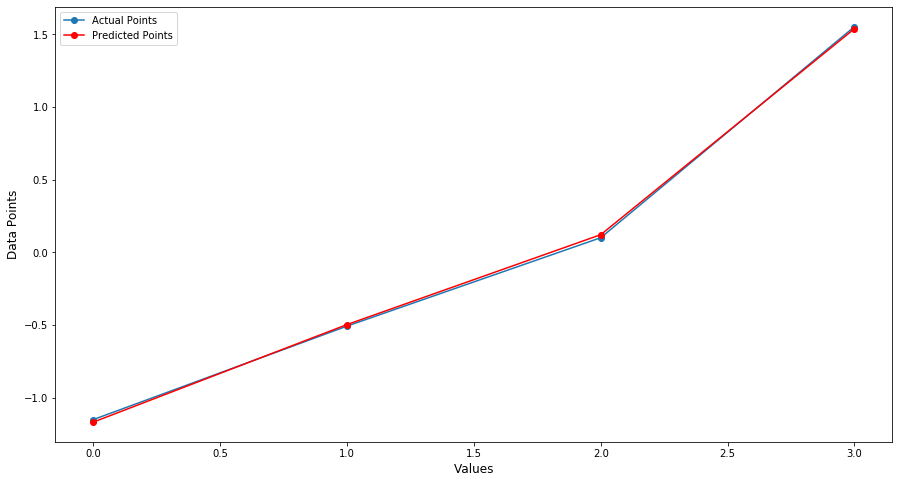

*********************************************************************************
Data Rows: 20 & Noise: 0.5
Error for Linear Model:
[0.00039230114934080693]
Error of Quadratic Model:
[0.00037259002665366995]
Error of Cubic Model:
[0.0004990420482264301]
Quadratic Polynomial Model is the best fit for Output Column: 1
Lambda Value Selected:0.1
The mse for Output Column 1 is 0.00031402853124462045


<Figure size 432x288 with 0 Axes>

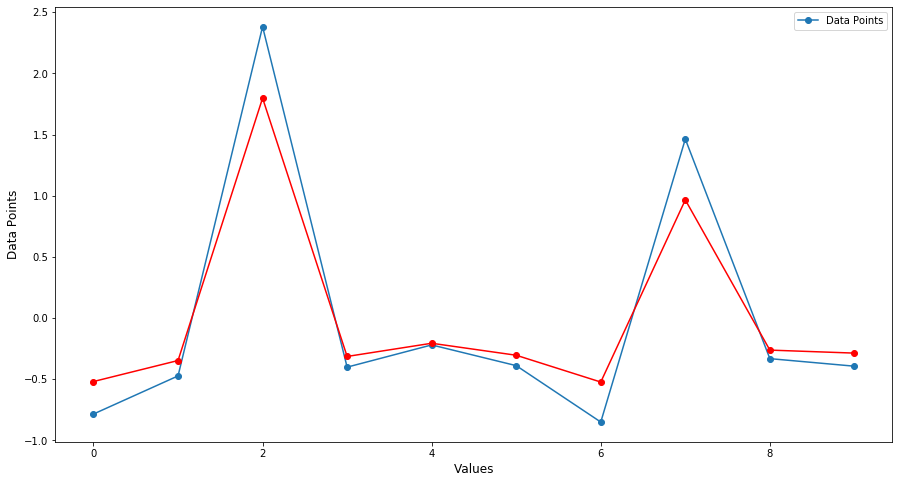

*********************************************************************************
Data Rows: 50 & Noise: 0.5
Error for Linear Model:
[8.163662898734978e-05]
Error of Quadratic Model:
[0.00014292154529583616]
Error of Cubic Model:
[0.0005963972554214112]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 0.000200693205295415


<Figure size 432x288 with 0 Axes>

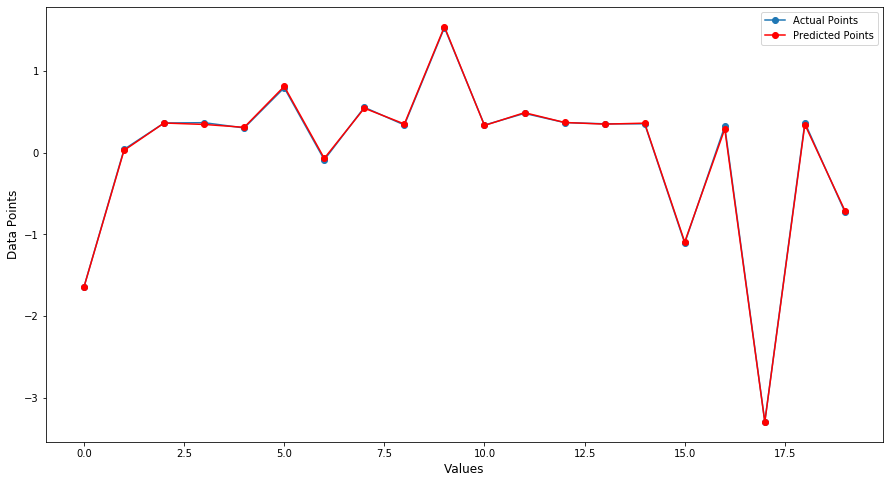

*********************************************************************************
Data Rows: 100 & Noise: 0.5
Error for Linear Model:
[0.00011915011313678287]
Error of Quadratic Model:
[0.00012359623033582077]
Error of Cubic Model:
[0.00011913882411581469]
Cubic Polynomial Model is the best fit for Output Column: 1
Lambda:0.1
The mse for Output Column 1 is 0.015186158549972018


<Figure size 432x288 with 0 Axes>

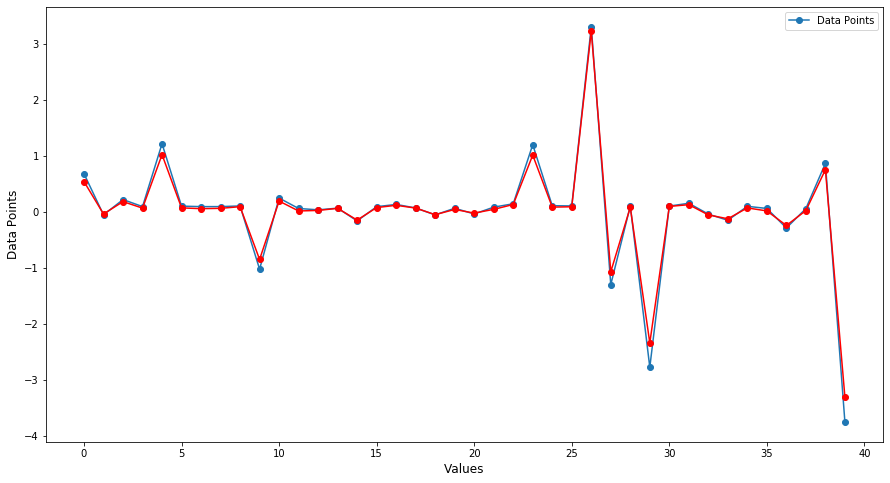

*********************************************************************************
Data Rows: 200 & Noise: 0.5
Error for Linear Model:
[0.00010478282335116067]
Error of Quadratic Model:
[0.00010477788686482252]
Error of Cubic Model:
[0.00010809121223457057]
Quadratic Polynomial Model is the best fit for Output Column: 1
Lambda Value Selected:0.1
The mse for Output Column 1 is 0.00015442590330533757


<Figure size 432x288 with 0 Axes>

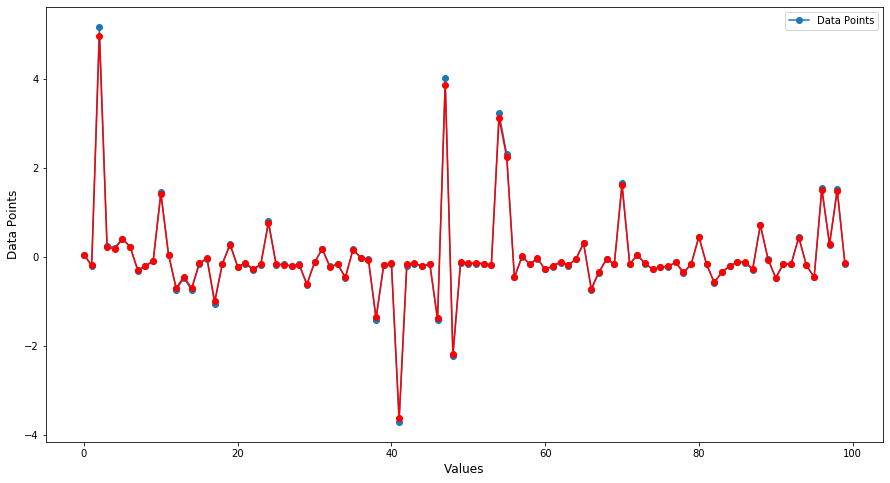

*********************************************************************************
Data Rows: 500 & Noise: 0.5
5-Fold Cross Validation not Possible. Linear Model Implemented
The mse for Output Column 1 is 5.057351324605691


<Figure size 432x288 with 0 Axes>

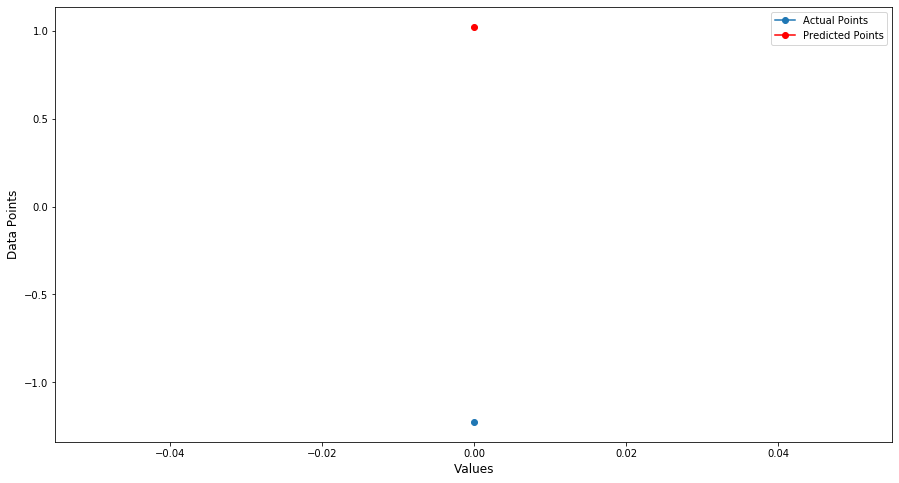

Data Rows: 2 & Noise: 1
5-Fold Cross Validation not Possible. Linear Model Implemented
The mse for Output Column 1 is 22.55907882270339


<Figure size 432x288 with 0 Axes>

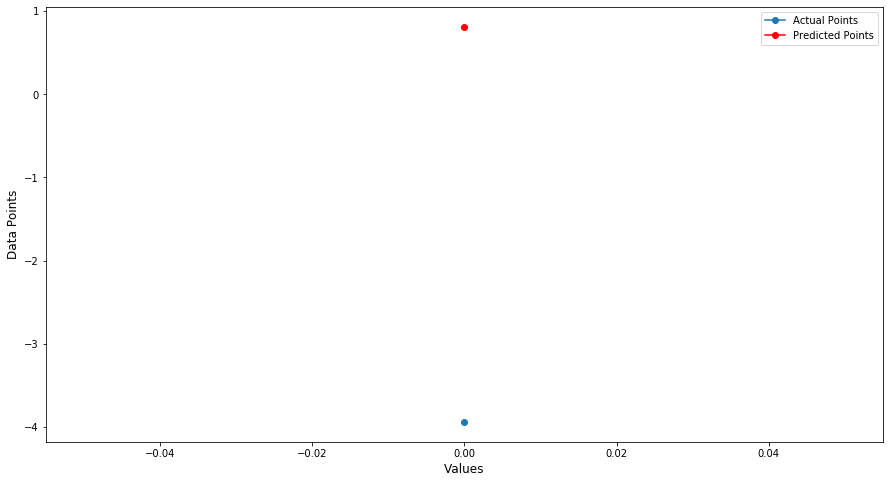

Data Rows: 5 & Noise: 1
Error for Linear Model:
[0.0013188156670427323]
Error of Quadratic Model:
[0.0014130033734361031]
Error of Cubic Model:
[0.05264168546938162]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 1.2438973228718895e-07


<Figure size 432x288 with 0 Axes>

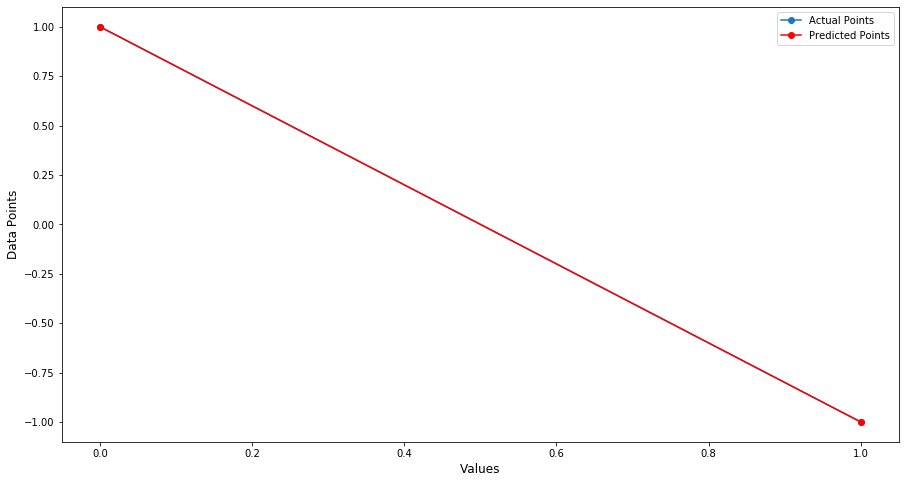

*********************************************************************************
Data Rows: 10 & Noise: 1
Error for Linear Model:
[0.00024324631854666514]
Error of Quadratic Model:
[0.010736663901467833]
Error of Cubic Model:
[8.330306291303867]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 2.538890715220608e-07


<Figure size 432x288 with 0 Axes>

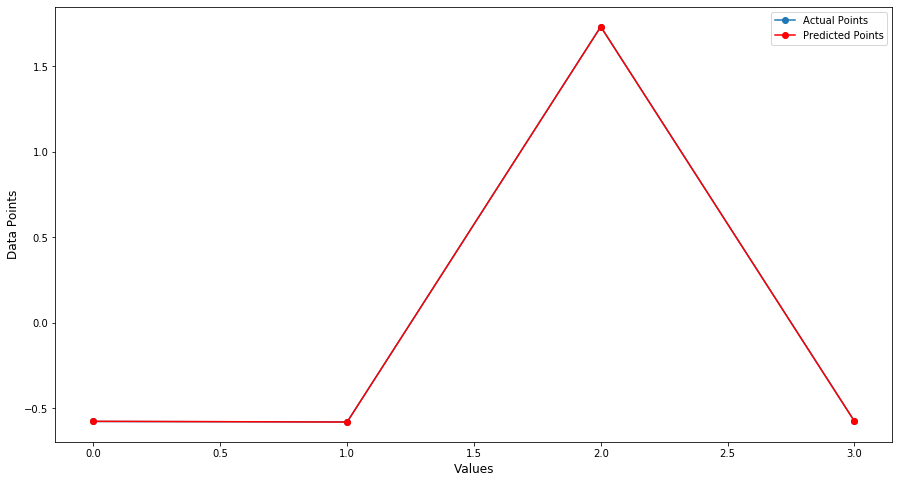

*********************************************************************************
Data Rows: 20 & Noise: 1
Error for Linear Model:
[0.0013907837424867319]
Error of Quadratic Model:
[0.0030336400233803773]
Error of Cubic Model:
[0.03374899417047632]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 0.0006205514382275027


<Figure size 432x288 with 0 Axes>

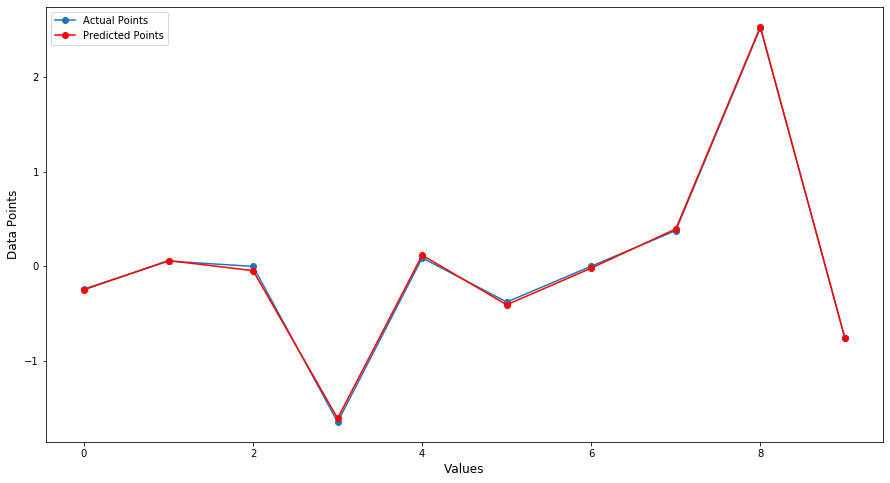

*********************************************************************************
Data Rows: 50 & Noise: 1
Error for Linear Model:
[0.0013391468122137002]
Error of Quadratic Model:
[0.0015765766326632283]
Error of Cubic Model:
[0.0014593430294215133]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 0.023844031578755105


<Figure size 432x288 with 0 Axes>

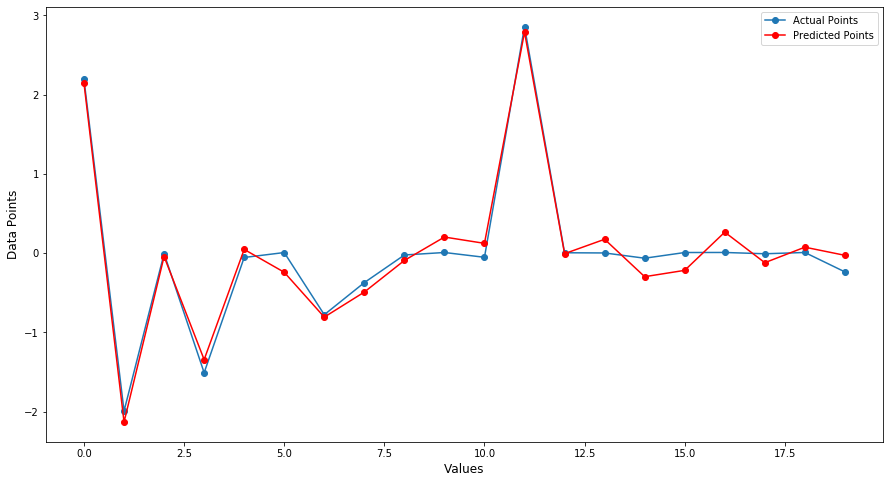

*********************************************************************************
Data Rows: 100 & Noise: 1
Error for Linear Model:
[0.0008441889277739764]
Error of Quadratic Model:
[0.0008588284954071136]
Error of Cubic Model:
[0.0008740711544961588]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 1 is 0.0014760550303185927


<Figure size 432x288 with 0 Axes>

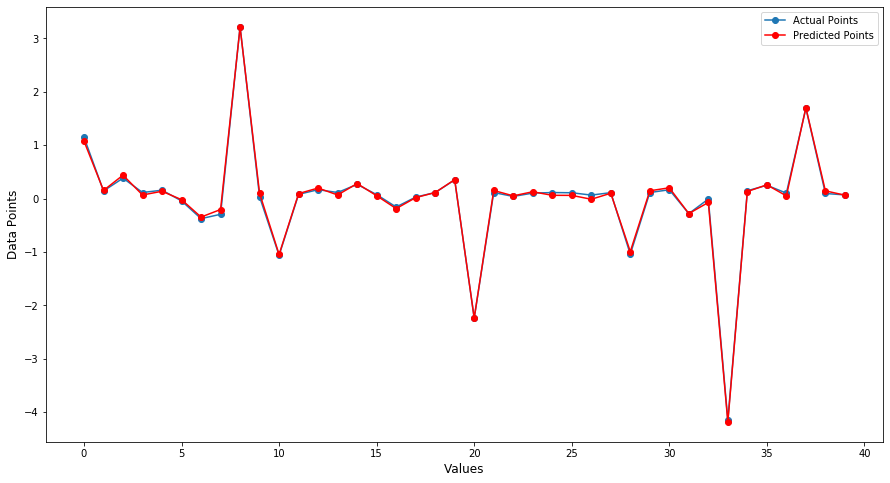

*********************************************************************************
Data Rows: 200 & Noise: 1
Error for Linear Model:
[0.00047860511755401524]
Error of Quadratic Model:
[0.0004853468534598923]
Error of Cubic Model:
[0.0004763259441114903]
Cubic Polynomial Model is the best fit for Output Column: 1
Lambda:0.1
The mse for Output Column 1 is 0.002400935887420389


<Figure size 432x288 with 0 Axes>

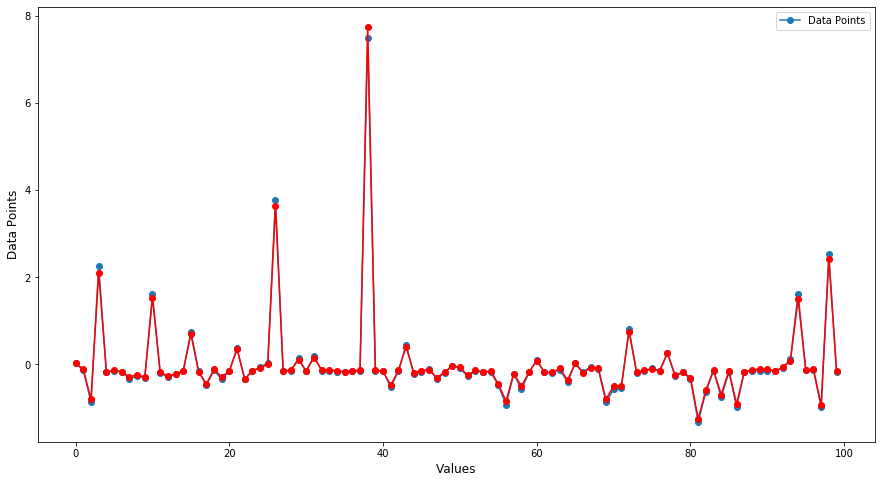

*********************************************************************************
Data Rows: 500 & Noise: 1


In [13]:
#Dataframe_creation to find MSEs for all combination of Noise and Data Rows
#Data sets with 2 and 5 rows cannot be divided into 80% & 20%. So, linear model is implemented on the data
dataframe_creation()

In [14]:
#The dataframe with corresponing errors and datasets are printed is printed
#The datasets with size 2 & 5 use Linear Model
#This is because 80/20 percent division & 5 Fold Cross Validation is not possible at the same time
data_val

,0.1,0.2,0.5,1.0
2,1.905299e+01,8.271788e+02,1.704282e+04,5.057351e+00
5,1.305915e+03,5.497779e-01,6.683581e+00,2.255908e+01
10,2.778034e-14,4.160394e-08,1.729973e-11,1.243897e-07
20,7.460911e-08,1.135626e-04,2.633401e-04,2.538891e-07
50,8.053541e-06,5.074036e-05,3.140285e-04,6.205514e-04
100,1.872386e-05,8.165682e-06,2.006932e-04,2.384403e-02
200,4.185818e-06,2.708950e-05,2.711080e-04,1.476055e-03
500,5.728056e-06,2.250248e-05,1.544259e-04,2.304685e-04


Question No 2 (d)

In [15]:
#The function is used to find the 2 minimum & 2 maximum values indexes of the dataframe
#After the values are chosen, MSEs are generated again using the parameters obtained
#The mse_calc then plots truth value and compare it with the weights obatined from the model selected
def min_max(data):

    max_val=-10
    smax_val=-11
    max_c=0
    max_r=0
    smax_c=0
    smax_r=0
    min_val=1000
    smin_val=500
    min_c=0
    min_r=0
    smin_c=0
    smin_r=0
    for c in [0.1,0.2,0.5,1.0]:
        for r in [2,5,10,20,50,100,200,500]:
            if data_val[c][r]>max_val:
                temp_val=max_val
                max_val=data_val[c][r]
                smax_val=temp_val
                smax_c=max_c
                smax_r=max_r
                max_c=c
                max_r=r


    for c in [0.1,0.2,0.5,1.0]:
        for r in [2,5,10,20,50,100,200,500]:
            if data_val[c][r]<min_val:
                temp_val=min_val
                min_val=data_val[c][r]
                smin_val=temp_val
                smin_c=min_c
                smin_r=min_r
                min_c=c
                min_r=r
    
    print('Dataset Size with Max MSE: '+ str(max_r))
    print('Noise with Max MSE: '+ str(max_c))
    max_mse=mse_calc(max_c,max_r)
    print('Dataset Size with Second Max MSE: '+ str(smax_r))
    print('Noise with Second Max MSE: '+ str(smax_c))
    smax_mse=mse_calc(smax_c,smax_r)
    print('Dataset Size with Min MSE: '+ str(min_r))
    print('Noise with Min MSE: '+ str(min_c))
    min_mse=mse_calc(min_c,min_r)
    print('Dataset Size with Second Min MSE: '+ str(smin_r))
    print('Noise with Second Min MSE: '+ str(smin_c))
    smin_mse=mse_calc(smin_c,smin_r)


In [16]:
#The mse_calc function is called from the min_max function and calculates the MSE of the 2 min & 2 max models
#The parameters chosen from the values are used to train the models again and generate new weights
#These weights are then multiplied on truth values to see how close they are to the true values
#The true values are then plotted with the predicted values to see how close they are to the true values & if the models work 
def mse_calc(col,row):
    plot_data=[]
    noise_list=[]
    truth_list=[]
    final_list=[]
    array_list=[]
    error_list=[]

    for i in range(0,row):
        rand_val=random.gauss(0,5)
        true_val=math.cos(float(rand_val)*float(rand_val))+0.1*(float(rand_val)**3)
        truth_list.append(true_val)
        noise=random.gauss(0,col)
        val=float(true_val) + float(noise)
        final_list.append(val)
        array_list=(final_list,truth_list)
        dfObj = pd.DataFrame(array_list)
    dfObj=dfObj.transpose()
    dfObj=dfObj.sample(frac=1).reset_index(drop=True)
    
    train_data=dfObj[0:len(dfObj)].to_numpy()
    
    for t in range(0,500):
        rand_val=random.gauss(0,5)
        plot_data.append(rand_val)
    test_data = pd.DataFrame({'col1':y_list,'col2':y_list})
    test_data=test_data.to_numpy()
    if row<10:
        train_y=train_data[:,-1]
        train_x=train_data[:,:-1]
        test_y=test_data[:,-1]
        test_x=test_data[:,:-1]
        final_mse=to_linear(train_x,test_x, train_y,1,test_y)
    
    else:
        final_mse=my_regression(train_data,test_data,1)
        
    return final_mse

<b>Question No 3</b>

<b>IMPORT DATA</b>
<ul>
    <li>Data from UCI Machine Learning repository is imported in the cell below</li>
    <li>Airfoil Data & Yacht Data did not have headers defined. Apt headers are defined to each columns</li>
    <li>Yacht Data had NaN values in some cells. The rows with NaN values are dropped. The NaN values could be replaced with mean of their respective rows, but we believe that is not a good representation of the data, and can lead in deviations to predicted results</li>

In [17]:
airfoil_header=['Frequency','AoA', 'C_Len', 'Velocity', 'Thickness', 'Pressure']
yacht_header=['Position', 'Prismatic', 'LDRatio', 'BDRatio', 'LBRatio','FN']

airfoil_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat', sep='\t', names= airfoil_header)

slump_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data")
slump_data.drop('No',inplace=True,axis=1)

yacht_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data", names= yacht_header, sep=' ')
yacht_data.reset_index(inplace=True)
yacht_data.drop('index',axis=1, inplace=True)
yacht_data.dropna(inplace=True)

Error for Linear Model:
[0.4933846267035634]
Error of Quadratic Model:
[0.3697443076986439]
Error of Cubic Model:
[0.26162995444441844]
Cubic Polynomial Model is the best fit for Output Column: 1
Lambda:0.1
The mse for Output Column 1 is 0.31619562602606555


<Figure size 432x288 with 0 Axes>

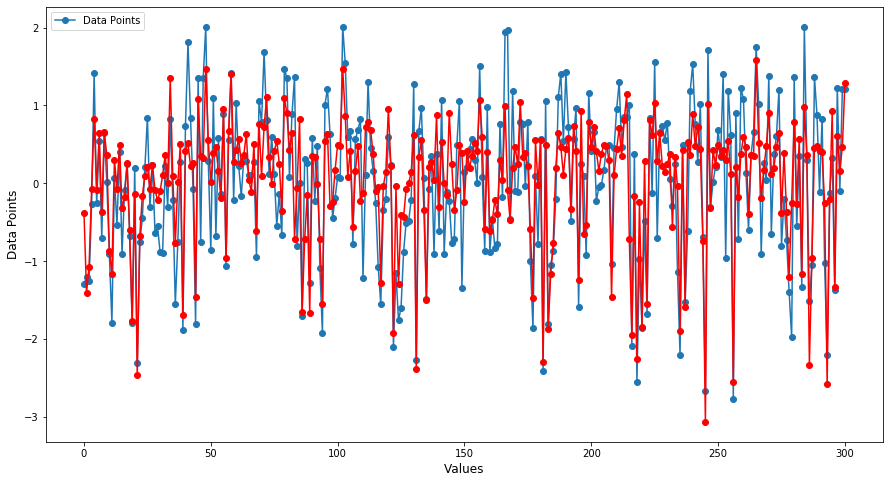

*********************************************************************************


0.3091528438019263

In [18]:
#Regression Function Implemented on Airfoil Dataset
airfoil_data=airfoil_data.sample(frac=1).reset_index(drop=True)
train_data=airfoil_data[0:int(0.8*len(airfoil_data))].to_numpy() #takin first 80% of given data as trainX
test_data=airfoil_data[int(0.8*len(airfoil_data)):].to_numpy()  #taking remaining 20% of the data set as testX
#train_data[:,5]
my_regression(train_data,test_data,1)

Error for Linear Model:
[0.37204634600425884]
Error of Quadratic Model:
[0.09106815321801229]
Error of Cubic Model:
[0.013757498323801515]
Cubic Polynomial Model is the best fit for Output Column: 1
Lambda:1
The mse for Output Column 1 is 0.028706108359888072


<Figure size 432x288 with 0 Axes>

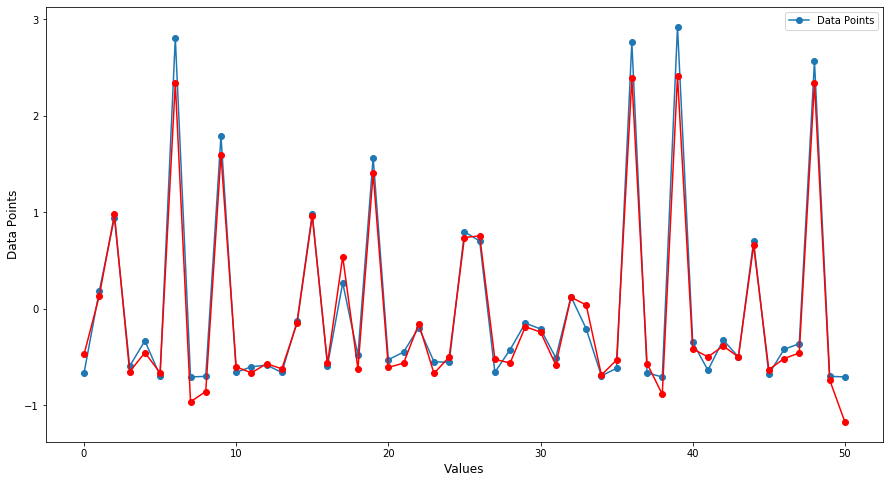

*********************************************************************************


0.022597947936393147

In [19]:
#Regression Function Implemented on Airfoil Dataset
yacht_data=yacht_data.sample(frac=1).reset_index(drop=True)
train_data=yacht_data[0:int(0.8*len(yacht_data))].to_numpy() #takin first 80% of given data as trainX
test_data=yacht_data[int(0.8*len(yacht_data)):].to_numpy()  #taking remaining 20% of the data set as testX
#train_data[:,5]
my_regression(train_data,test_data,1)

Error for Linear Model:
[0.8871291138956636, 0.6791380276424217, 0.1332456101618998]
Error of Quadratic Model:
[1.9145549660994245, 1.6911955168479902, 0.020908784640846906]
Error of Cubic Model:
[35.745873206463685, 32.87676696069845, 0.2880082485883155]
Linear Model is the best fit for Output Column: 1
The mse for Output Column 3 is 0.143023760592533


<Figure size 432x288 with 0 Axes>

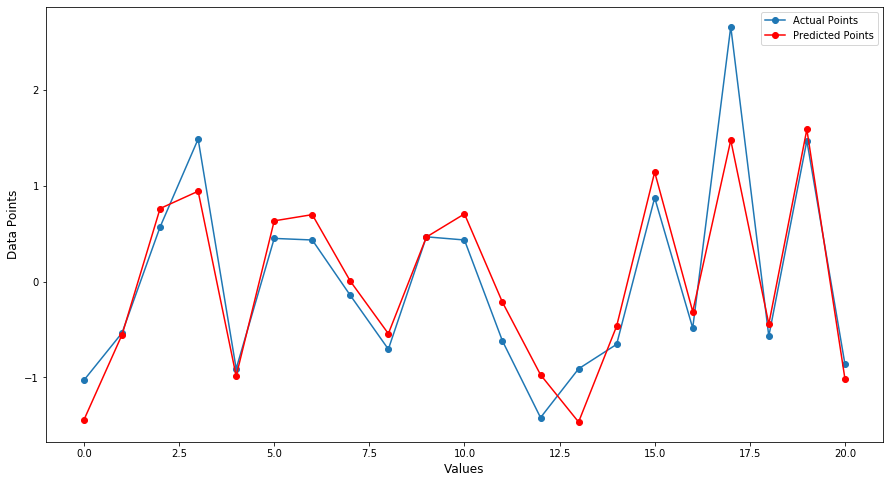

Linear Model is the best fit for Output Column: 2
The mse for Output Column 3 is 0.143023760592533


<Figure size 432x288 with 0 Axes>

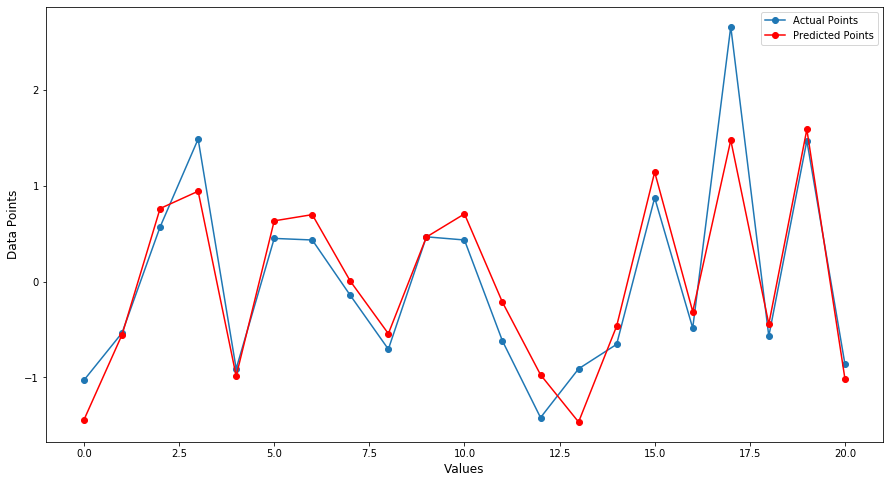

Quadratic Polynomial Model is the best fit for Output Column: 3
Lambda Value Selected:0.5
The mse for Output Column 3 is 0.047441288485375266


<Figure size 432x288 with 0 Axes>

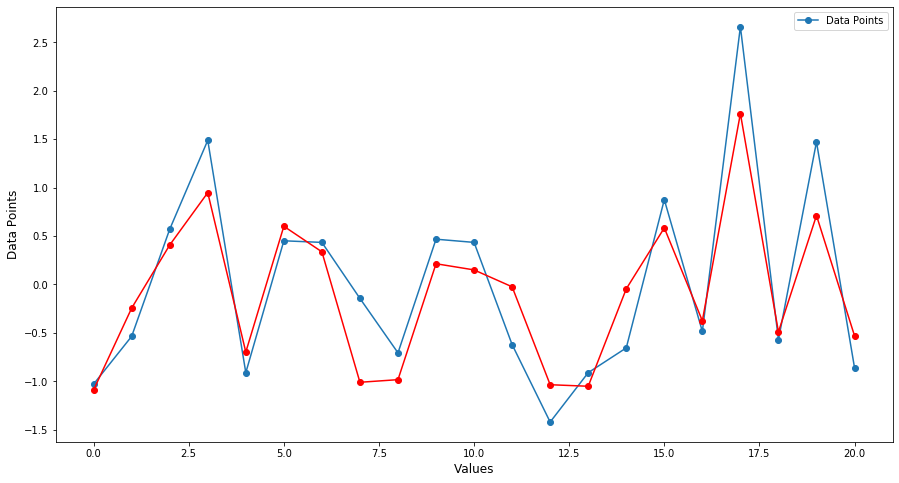

*********************************************************************************


0.047441288485375266

In [20]:
#Regression Function Implemented on Slump Dataset
slump_data=slump_data.sample(frac=1).reset_index(drop=True)
train_data=slump_data[0:int(0.8*len(slump_data))].to_numpy() #takin first 80% of given data as trainX
test_data=slump_data[int(0.8*len(slump_data)):].to_numpy()  #taking remaining 20% of the data set as testX
#train_data[:,5]
my_regression(train_data,test_data,3)